In [2]:
%matplotlib inline     
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")     

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()     

('2017-08-23',)

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]     # Using [0], you can access the first element of that tuple, which extracts the actual date value
#print(f'The date of the most recent data point is {most_recent_date_data.date()}')

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days = 366)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()     
#precipitation_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
percipitation_data_df = pd.DataFrame(precipitation_data, columns = ["date", "precipitation"])
#percipitation_data_df

# Sort the dataframe by date
percipitation_data_df["date"] = pd.to_datetime(percipitation_data_df["date"])
percipitation_data_sorted_df = percipitation_data_df.sort_values(by = "date")
#percipitation_data_sorted_df

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


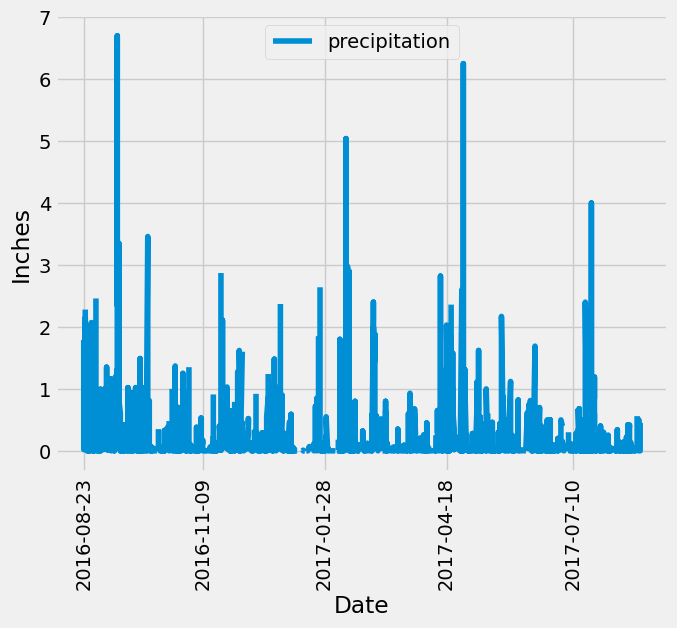

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data

# Set specific tick positions and labels to match the solution graph in the starter_code file
specific_dates = ["2016-08-23", "2016-11-09", "2017-01-28", "2017-04-18", "2017-07-10"]
tick_positions = pd.to_datetime(specific_dates)  # Convert to datetime

# Plot
plt.figure(figsize = (7, 6.5))
plt.plot(percipitation_data_sorted_df["date"], percipitation_data_sorted_df["precipitation"], linestyle = "-", label = "precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(tick_positions, specific_dates, rotation = 90)
plt.legend(loc = "upper center")
plt.tight_layout()
plt.show()

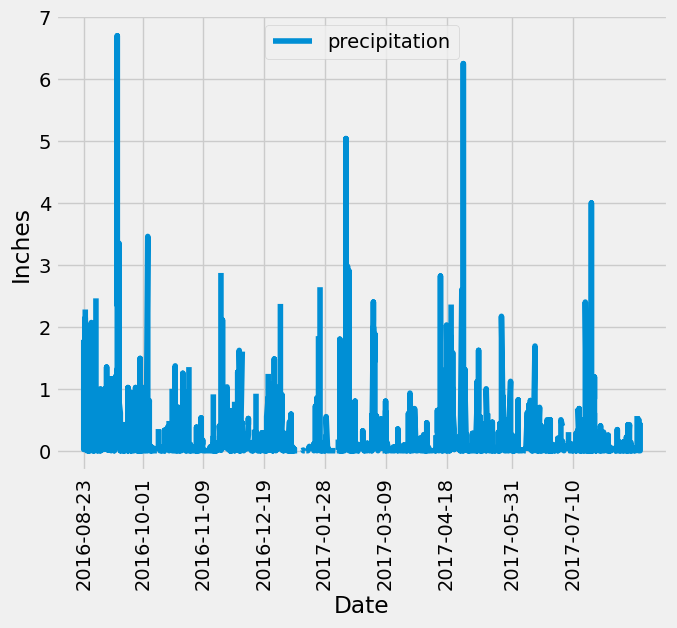

In [13]:
# Repeated above with dates to match the solution graph in the bootcamp spot module 10 challenge instructrions page.... wasn't sure which one was wanted

# Use Pandas Plotting with Matplotlib to plot the data

# Set specific tick positions and labels to match the solution graph in the bootcamp spot module 10 challenge instructrions page
specific_dates = ["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"]
tick_positions = pd.to_datetime(specific_dates)  # Convert to datetime

# Plot
plt.figure(figsize = (7, 6.5))
plt.plot(percipitation_data_sorted_df["date"], percipitation_data_sorted_df["precipitation"], linestyle = "-", label = "precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(tick_positions, specific_dates, rotation = 90)
plt.legend(loc = "upper center")
plt.tight_layout()
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data

# Calculate summary statistics for the precipitation data
percipitation_summary_statistics = percipitation_data_sorted_df["precipitation"].describe()

# Convert the summary statistics to a DataFrame
percipitation_summary_statistics_df = pd.DataFrame(percipitation_summary_statistics)

# Display the DataFrame
percipitation_summary_statistics_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = "USC00519281"

most_active_station_aggregations = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs).filter(measurement.station == most_active_station)).all()
most_active_station_aggregations

[(53.0, 87.0, 71.66378066378067)]

In [23]:
# Query the last 12 months of temperature observation data for the most active station
most_active_station_temperature_data = session.query(measurement.tobs).filter(measurement.station == most_active_station, measurement.date >= one_year_ago).all()
#most_active_station_temperature_data

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [24]:
# Load results into a Pandas DataFrame
most_active_station_temperature_data_df = pd.DataFrame(most_active_station_temperature_data, columns = ["tobs"])
#most_active_station_temperature_data_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


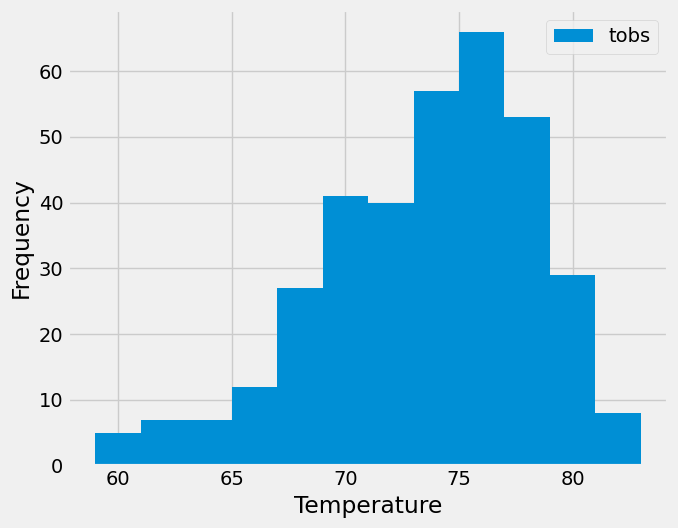

In [21]:
# Plot the histogram
plt.figure(figsize = (7, 5.5))
plt.hist(most_active_station_temperature_data_df["tobs"], bins = 12, label = "tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")
plt.tight_layout()
plt.show()

# Close Session

In [228]:
# Close Session
session.close()